### Plots in Data Science


    Tools for Data Visualization in Python
    
        matplotlib
        seaborn
        Plotly & Dash
        Bookeh

        EDA -> matplotlib 90% data scientist
        
        Report -> Industry Ready Plot -> Story Telling

In [2]:
import matplotlib as mpl
print("Matplotlib Version ", mpl.__version__)

Matplotlib Version  3.5.1


`Types of Plots in Data Science`

    1. Line Plot
    2. Histogram / Density
    3. Bar Chart
    4. Pie Chart
    5. Box Plot
    6. Scatter Plot
    7. Image Plot
    8. Map Plot
    9. Matrix Plot / Heatmap (Arrays)  
    
    

`Line Plot`

    1. Continous Random Varaibles 
    2. Times Series or incresing or decresing Variable
    3. Bi-variate

In [3]:
# EDA Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
flight = sns.load_dataset('flights')

In [5]:
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [10]:
flight.query('year==1959')

,year,month,passengers
120,1959,Jan,360
121,1959,Feb,342
122,1959,Mar,406
123,1959,Apr,396
124,1959,May,420
125,1959,Jun,472
126,1959,Jul,548
127,1959,Aug,559
128,1959,Sep,463
129,1959,Oct,407


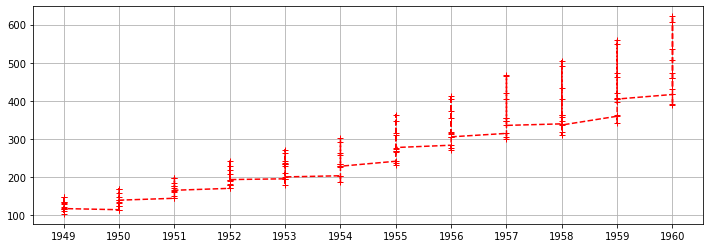

In [18]:
plt.figure(figsize=(12, 4))
plt.plot("year", "passengers", "--r+", data=flight)
plt.xticks(flight["year"].unique())
plt.grid()
plt.show()

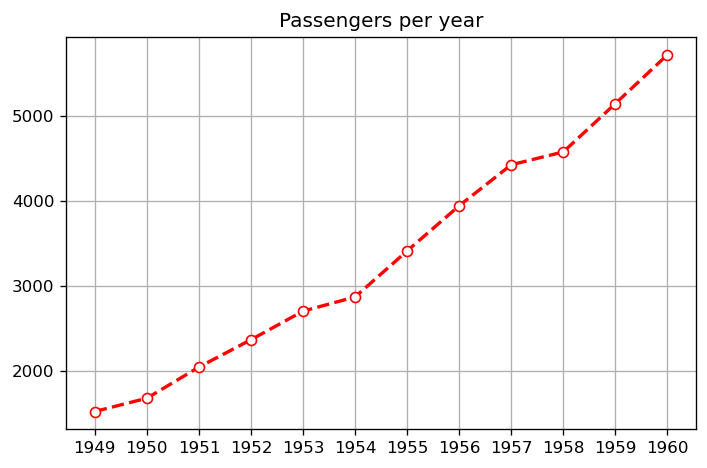

In [29]:
result = flight.groupby('year').sum().reset_index()
plt.figure(dpi=120)
plt.title("Passengers per year")
plt.plot("year", "passengers", '--or', mfc='w', lw=2, data=result)
plt.xticks(flight['year'].unique())
plt.grid()
plt.tight_layout()
plt.show()

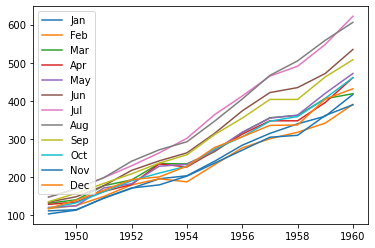

In [46]:
for month, data in flight.groupby("month"):
    plt.plot('year', 'passengers', data=data, label=month)
plt.legend()
plt.show() 

In [76]:
import warnings
warnings.filterwarnings(action='ignore')

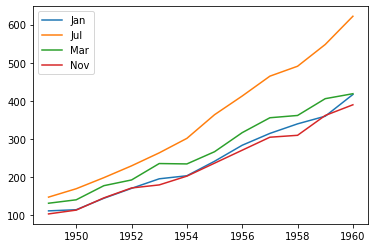

In [82]:
d = flight[flight['month'].isin(["Jan", "Mar", "Nov", "Jul"])]
d.loc[:, 'month'] = d['month'].astype("str")
fig, ax = plt.subplots()
for month, data in d.groupby("month"):
    ax.plot('year', 'passengers', data=data, label=month)
    
ax.legend()
plt.show()

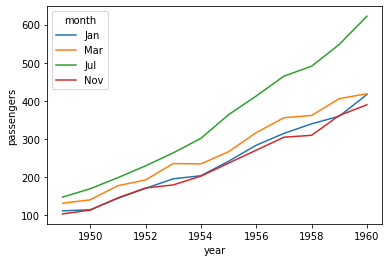

In [91]:
sns.lineplot(x="year", y="passengers", data=d, hue='month')
plt.show()

In [83]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


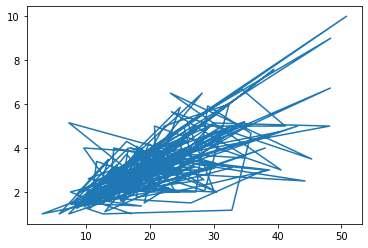

In [85]:
# 
plt.plot("total_bill", "tip", data=tips)
plt.show()

In [94]:
tb = tips['total_bill'].to_numpy()
tt = tips['tip'].to_numpy()

In [95]:
ix = np.argsort(tips['total_bill'])

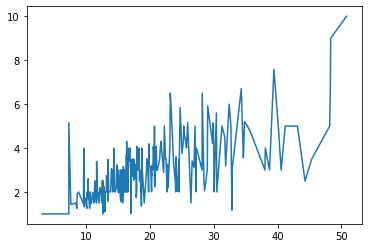

In [97]:
plt.plot(tb[ix], tt[ix])
plt.show()

In [100]:
tips.sort_values("total_bill", inplace=True)

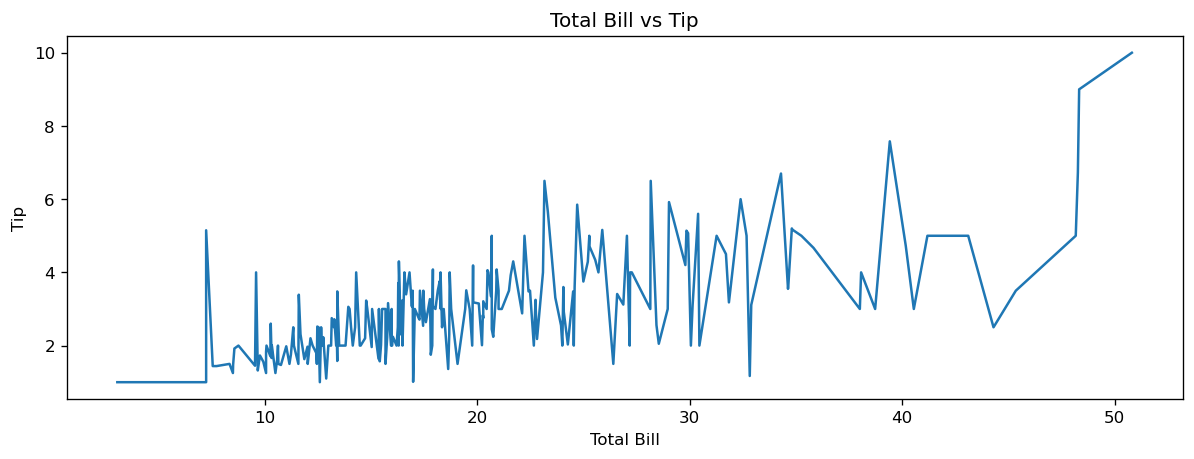

In [103]:
plt.figure(figsize=(12, 4), dpi=120)
plt.plot('total_bill', 'tip', data=tips)
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In [114]:
plt.rcParams["font.size"] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['axes.titlecolor'] = "red"
plt.rcParams['axes.titlesize'] = 20

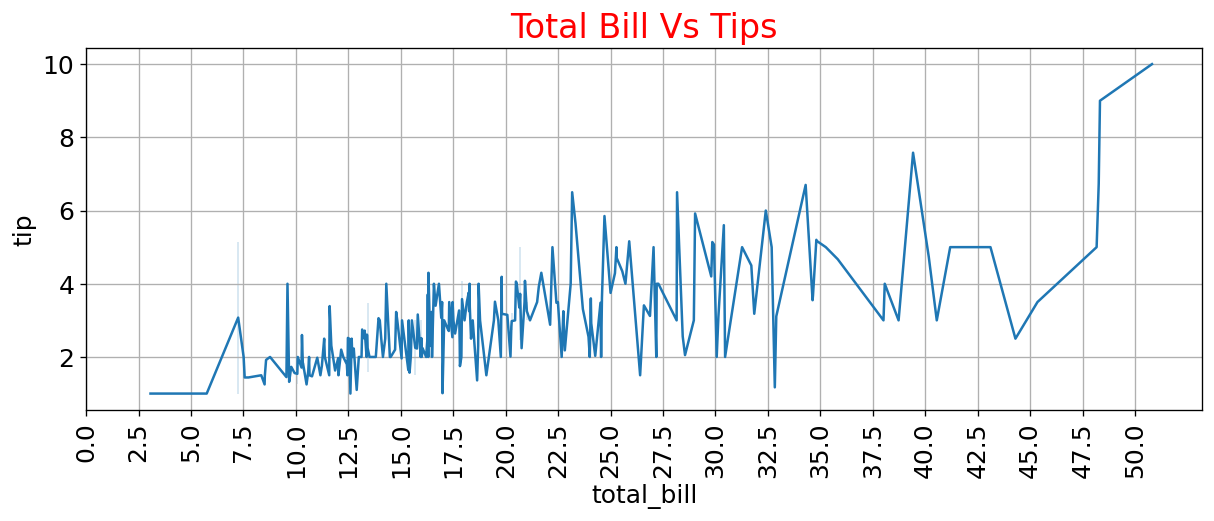

In [126]:
fig, ax = plt.subplots()
sns.lineplot(x="total_bill", y="tip", data=tips, ax=ax)

ax.set_title("Total Bill Vs Tips")
ax.grid()

plt.xticks(np.arange(0, 50.1, 2.5), rotation=90)
plt.show()

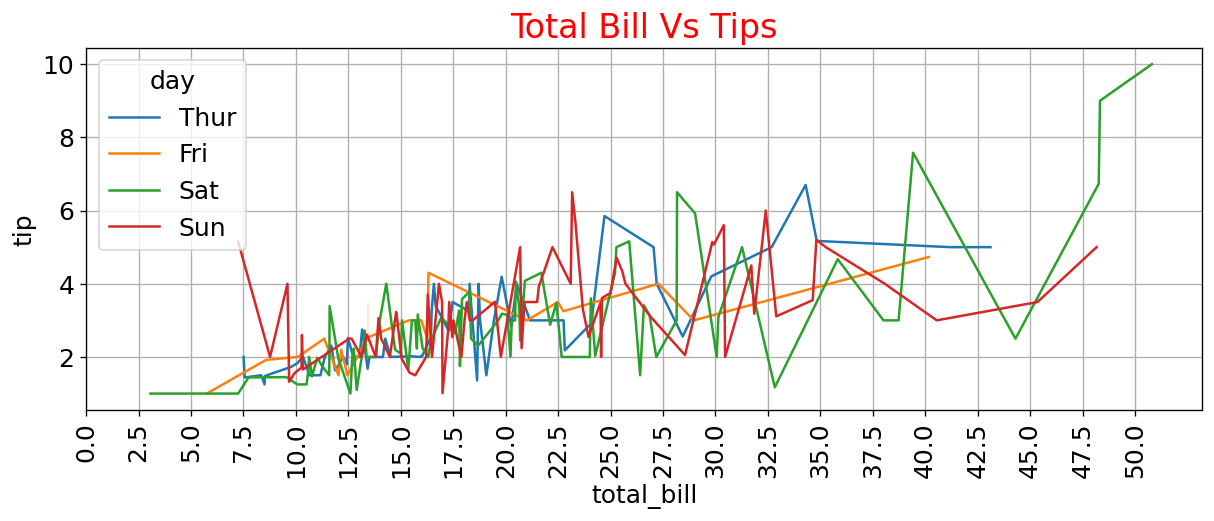

In [130]:
fig, ax = plt.subplots()
sns.lineplot(x="total_bill", y="tip", data=tips, ax=ax, hue="day")

ax.set_title("Total Bill Vs Tips")
ax.grid()

plt.xticks(np.arange(0, 50.1, 2.5), rotation=90)
#ax.set_xlim(10, 20)
plt.show()

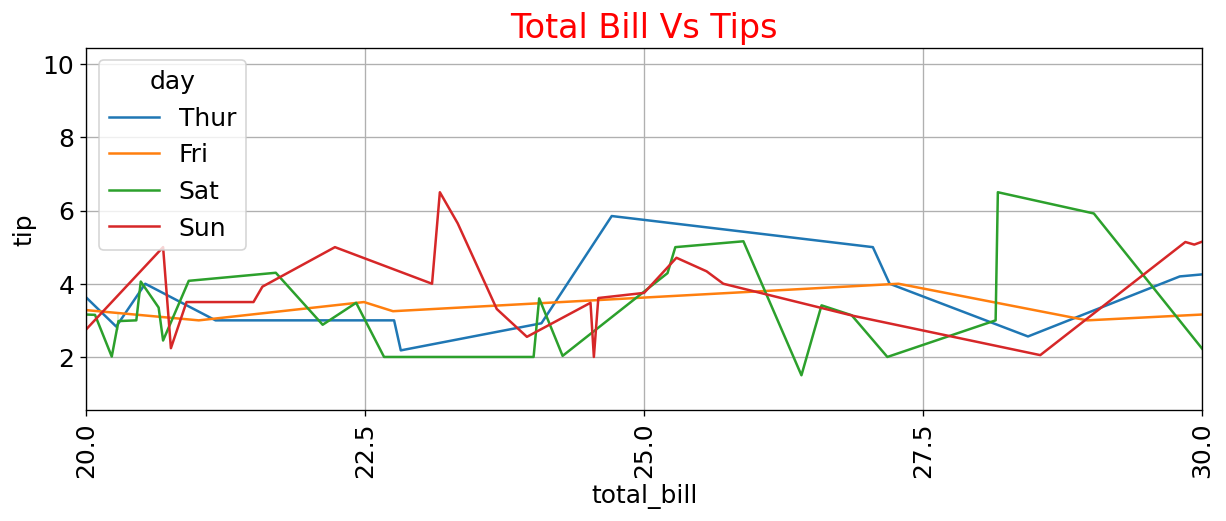

In [131]:
fig, ax = plt.subplots()
sns.lineplot(x="total_bill", y="tip", data=tips, ax=ax, hue="day")

ax.set_title("Total Bill Vs Tips")
ax.grid()

plt.xticks(np.arange(0, 50.1, 2.5), rotation=90)
ax.set_xlim(20, 30)
plt.show()

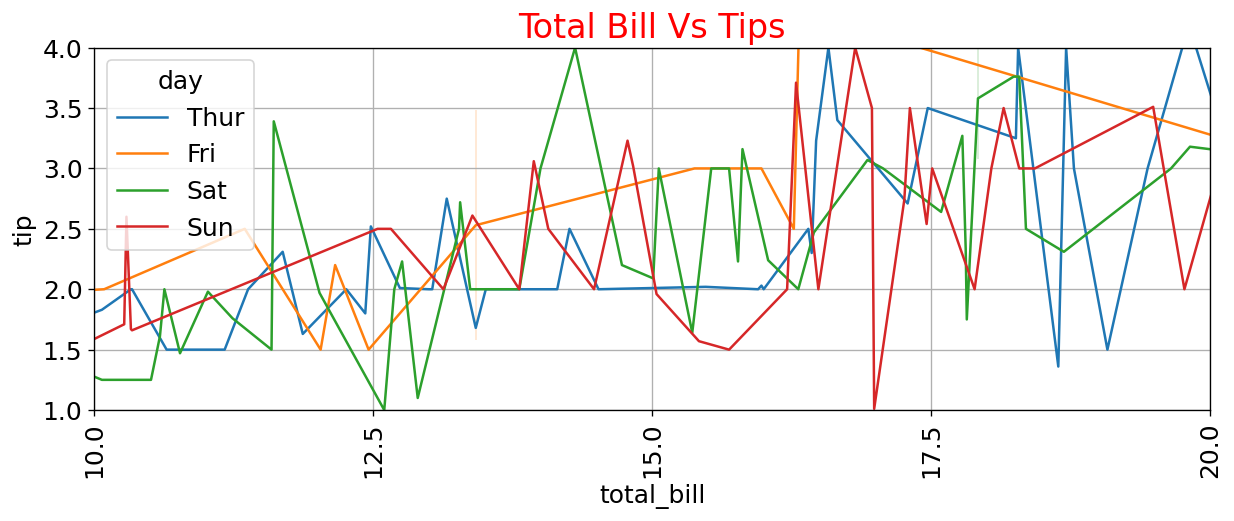

In [134]:
fig, ax = plt.subplots()
sns.lineplot(x="total_bill", y="tip", data=tips, ax=ax, hue="day")

ax.set_title("Total Bill Vs Tips")
ax.grid()

plt.xticks(np.arange(0, 50.1, 2.5), rotation=90)
ax.set_ylim(1, 4)
ax.set_xlim(10, 20)
plt.show()

### Scatter Plot

    Correlation 

    study hours
                            increase study hours will produce better result
    result 

    stress
                        if we increase stress there will decrease in work effiency
    work effiency

`Correlation Coef`


    used to measure linear dependency of two Random Variables 
    

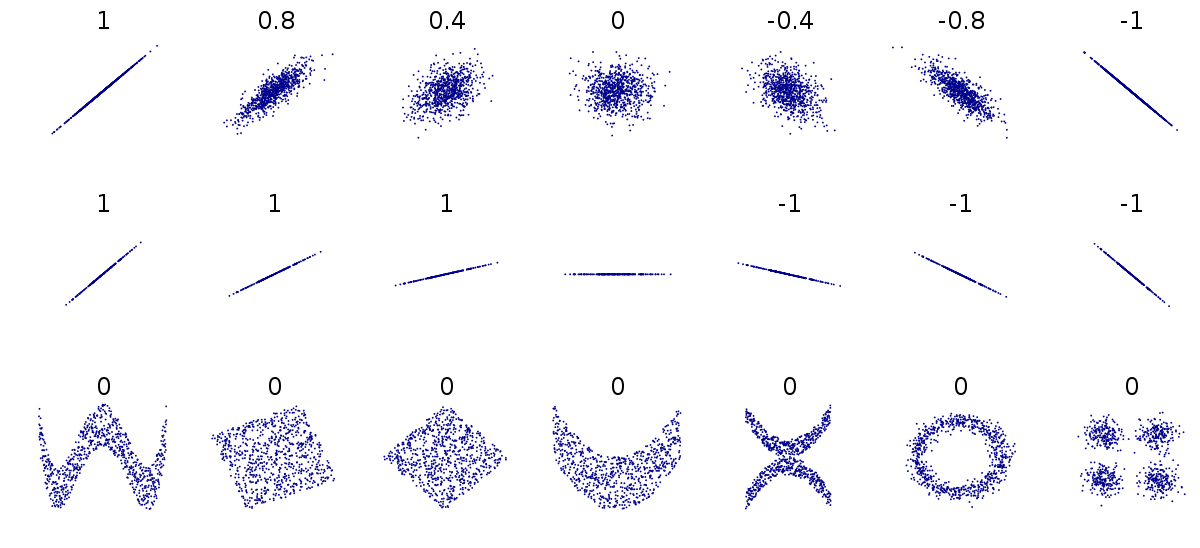

$$r = \frac  {\sum { {(x_i -\bar x)} {(y_i -\bar y_i)}}} {\sum { {(x_i -\bar x)}^2 {(y_i -\bar y_i)}^2}}$$

In [137]:
r = np.corrcoef(tips["total_bill"], tips["tip"])[0, 1]

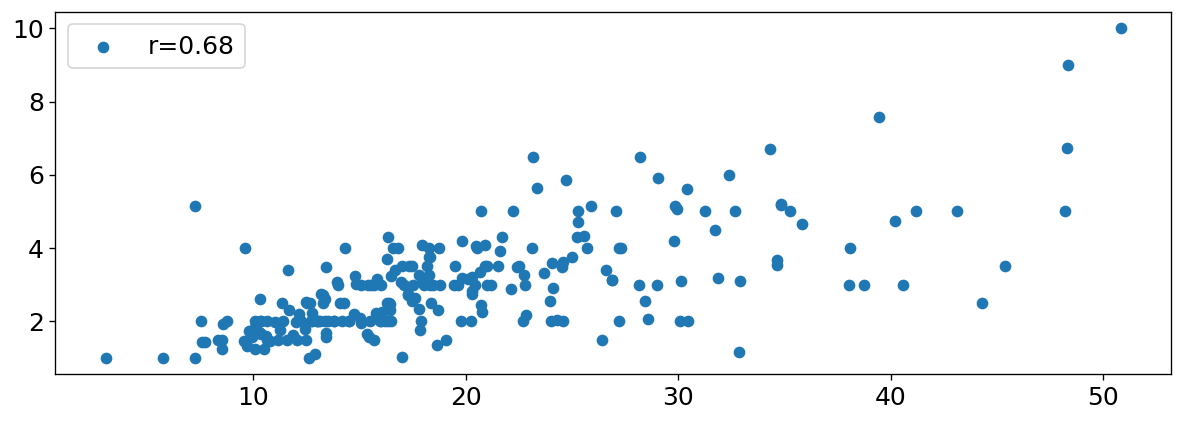

In [145]:
plt.scatter("total_bill", "tip", data=tips, label=f"r={r:.2f}")
plt.legend()
plt.show()

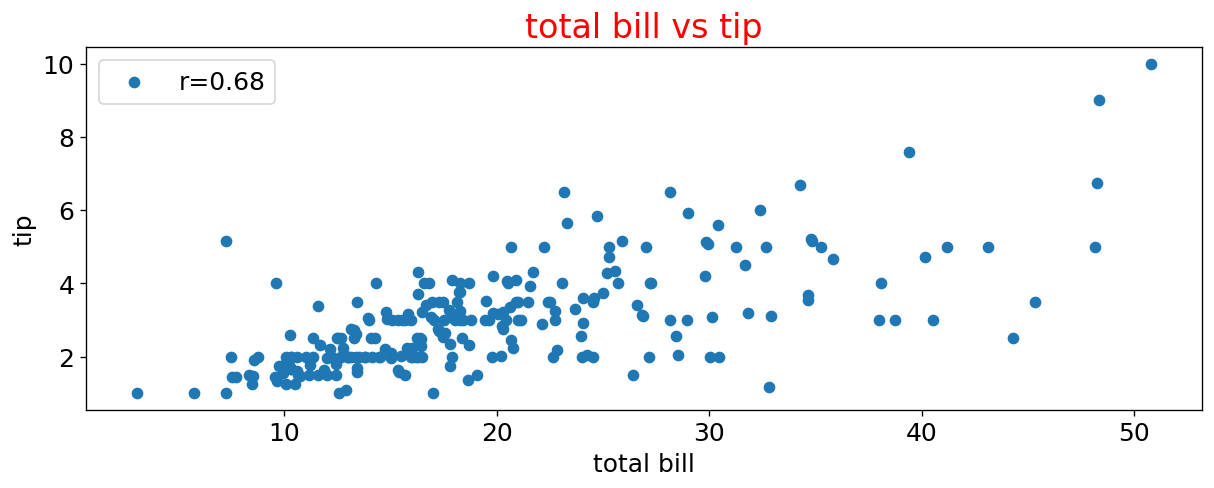

In [147]:
plt.scatter("total_bill", "tip", data=tips, label=f"r={r:.2f}")
plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("total bill vs tip")
plt.legend()
plt.show()

In [163]:
tips

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
59,48.27,6.73,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


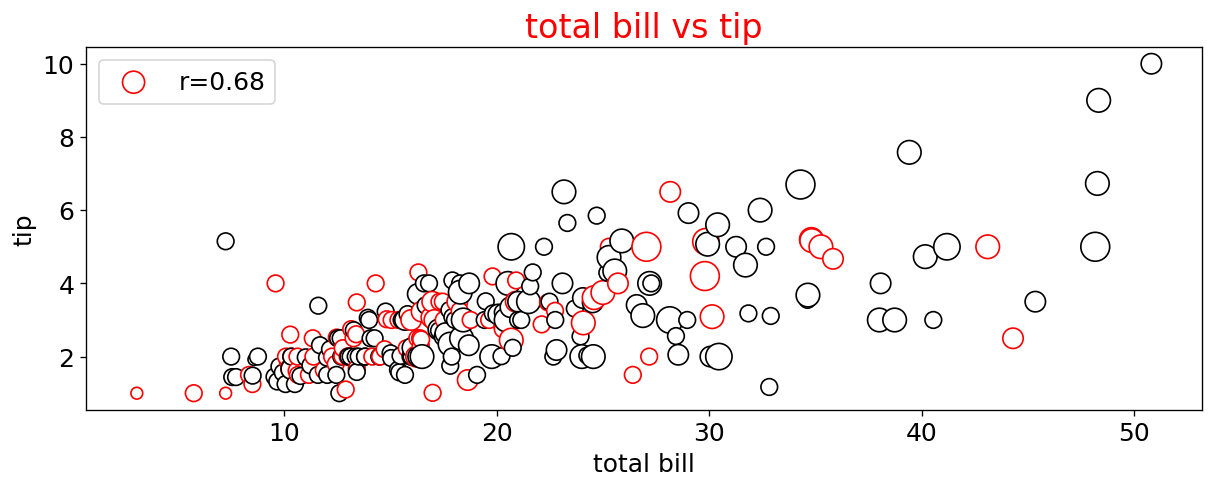

In [185]:
c = tips['sex'].map({"Female": "red", "Male": "k"}).to_list()
p = plt.scatter("total_bill", "tip", data=tips, label=f"r={r:.2f}",
               s=tips["size"]*50, fc='w', ec=c)

plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("total bill vs tip")
plt.legend()
plt.show()

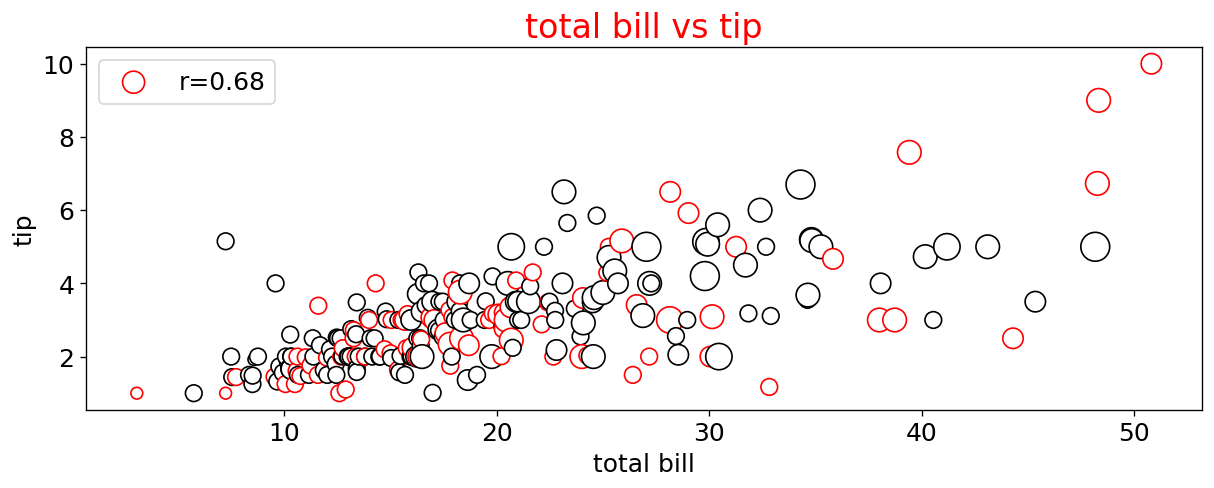

In [188]:
c = tips['day'].map({"Sat": "red", "Fri": "k", "Thur": "k", "Sun": "k"}).to_list()
p = plt.scatter("total_bill", "tip", data=tips, label=f"r={r:.2f}",
               s=tips["size"]*50, fc='w', ec=c)

plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("total bill vs tip")
plt.legend()
plt.show()

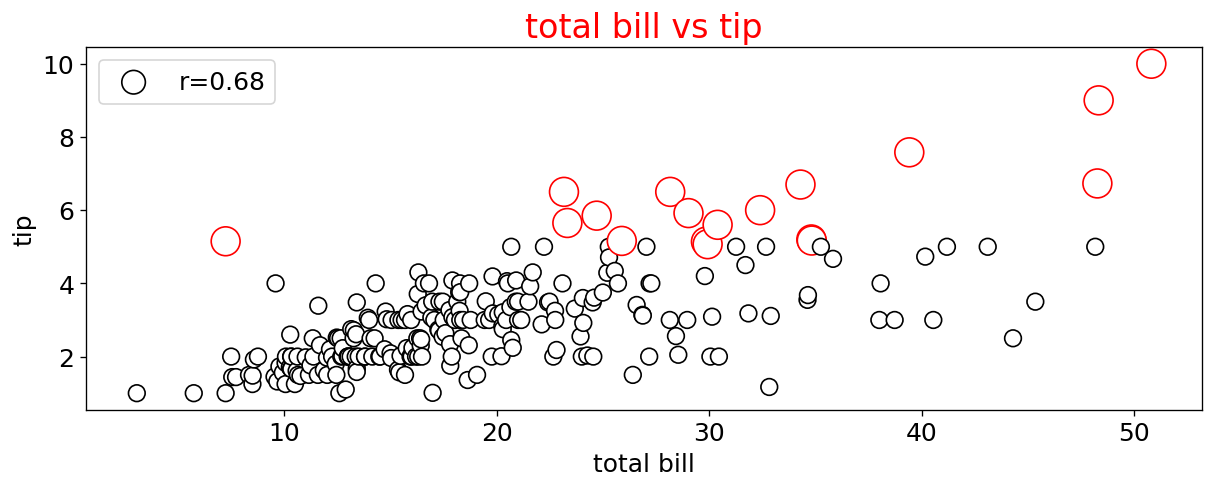

In [197]:
d = {True: 'r', False: 'k'}
sz = {True: 300, False: 100}
c = [d[v] for v in tips['tip']>5]
s = [sz[v] for v in tips['tip']>5]
p = plt.scatter("total_bill", "tip", data=tips, label=f"r={r:.2f}",
               s=s, fc='w', ec=c)

plt.xlabel("total bill")
plt.ylabel("tip")
plt.title("total bill vs tip")
plt.legend()
plt.show()

In [199]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


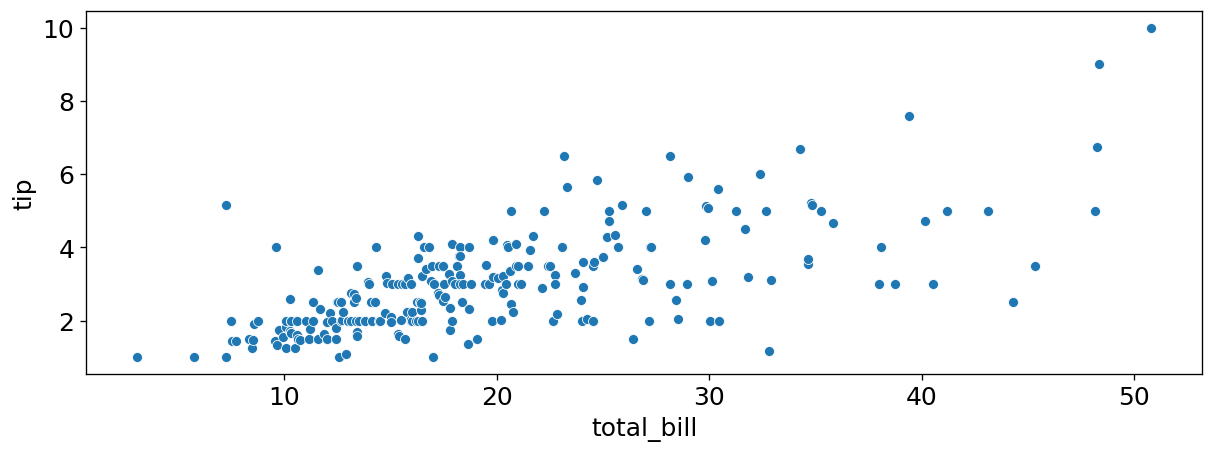

In [202]:
sns.scatterplot("total_bill", "tip", data=tips)
plt.show()

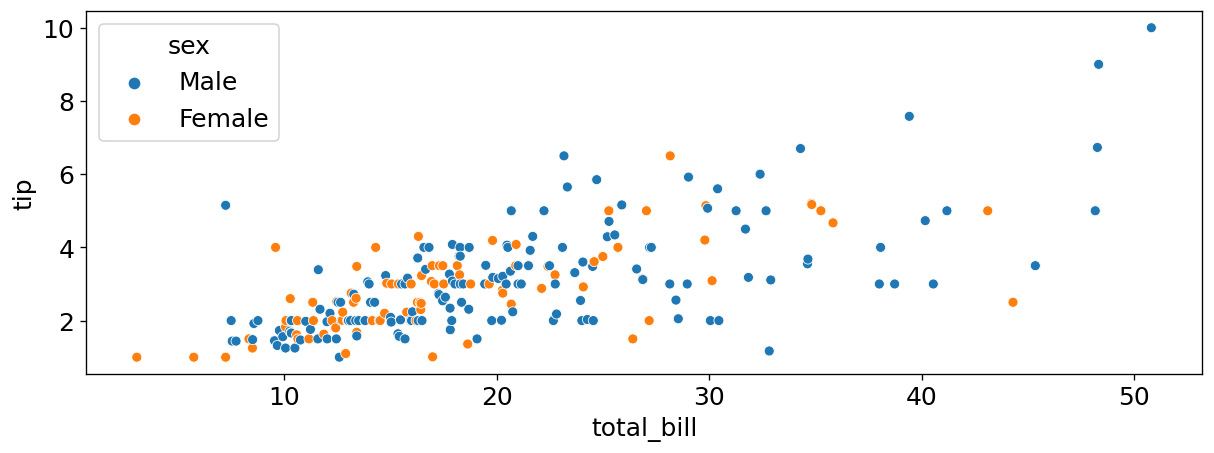

In [203]:
sns.scatterplot("total_bill", "tip", data=tips, hue='sex')
plt.show()

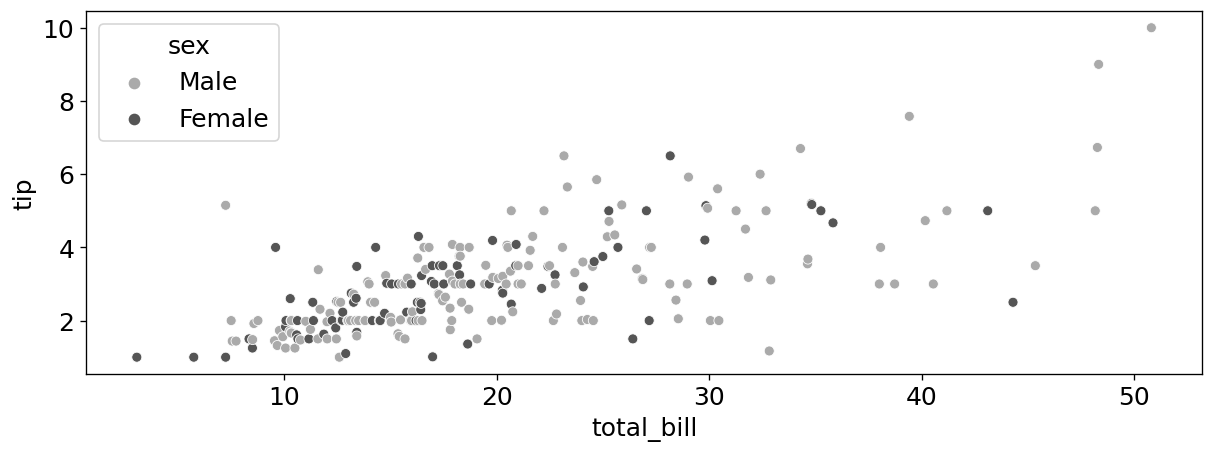

In [215]:
sns.scatterplot("total_bill", "tip", data=tips, hue='sex', palette="binary")
plt.show()

#### Histogram

In [273]:
def get_random_color():
    values = [*(map(str, range(10))), 'A', 'B', 'C', 'D', 'E', 'F']
    return "#"+"".join(np.random.choice(values, 6))

In [261]:
get_random_color()

'#A4F73F'

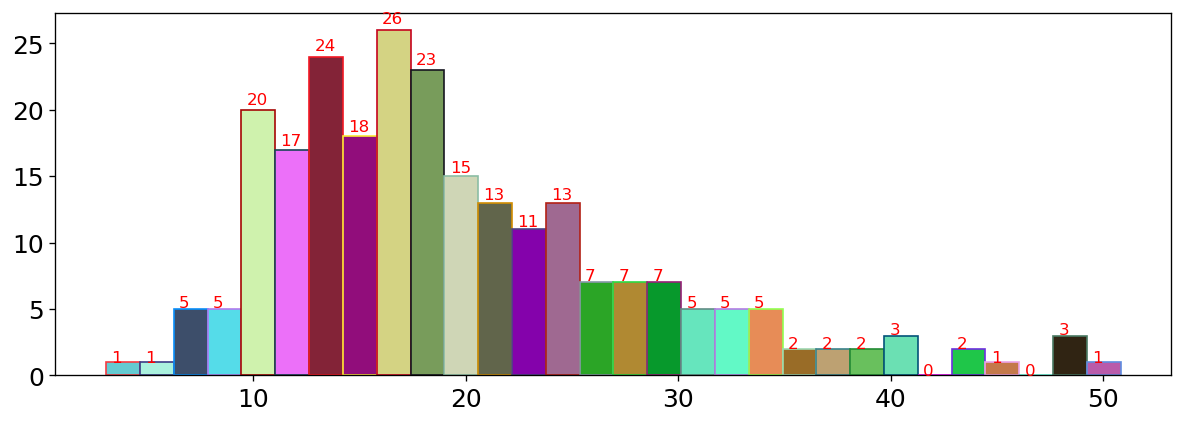

In [268]:
freq, cls, bars = plt.hist('total_bill', data=tips, bins=30)
for bar in bars:
    bar.set_fc(get_random_color())
    bar.set_ec(get_random_color())
    x = bar.get_x() + 0.25
    y = bar.get_height()
    y = y*1.02
    plt.text(x, y, int(bar.get_height()), fontsize=10, color='red')

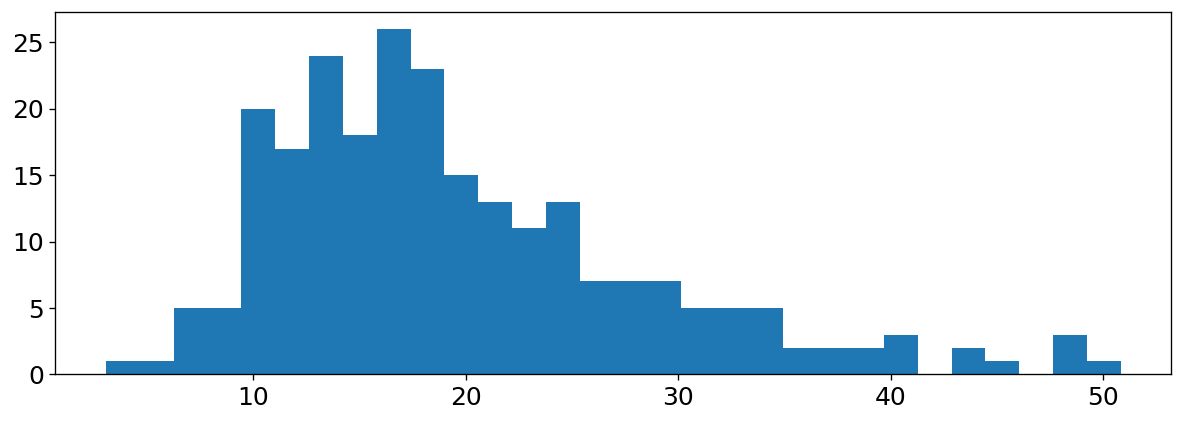

In [218]:
plt.hist('total_bill', data=tips, bins=30)
plt.show()

In [278]:
def col_gen():
    i = 0
    colors = ['red', 'green', 'blue', 'cyan']
    while True:
        if i >= len(colors):
            i = 0
        yield colors[i]
        i += 1
    
cg = col_gen()


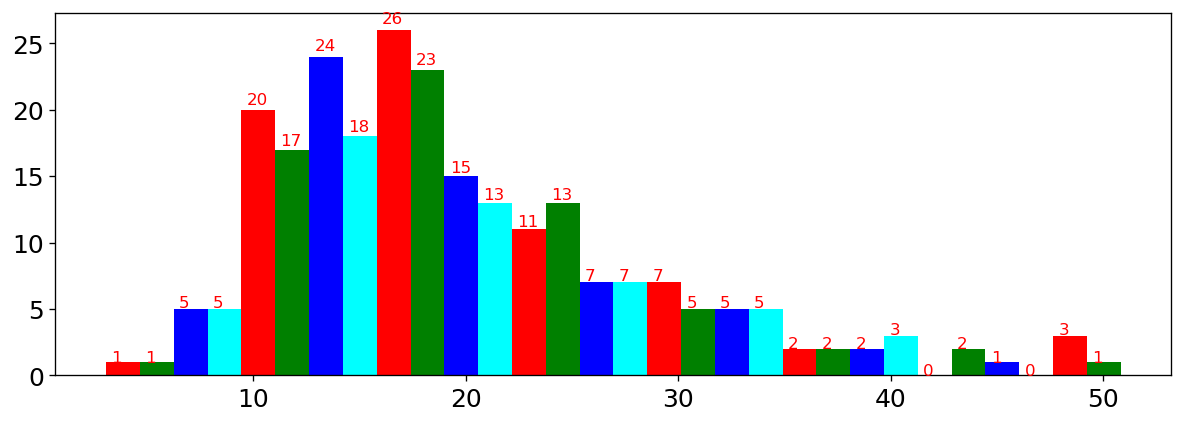

In [279]:
freq, cls, bars = plt.hist('total_bill', data=tips, bins=30)
for bar in bars:
    bar.set_fc(next(cg))
    x = bar.get_x() + 0.25
    y = bar.get_height()
    y = y*1.02
    plt.text(x, y, int(bar.get_height()), fontsize=10, color='red')

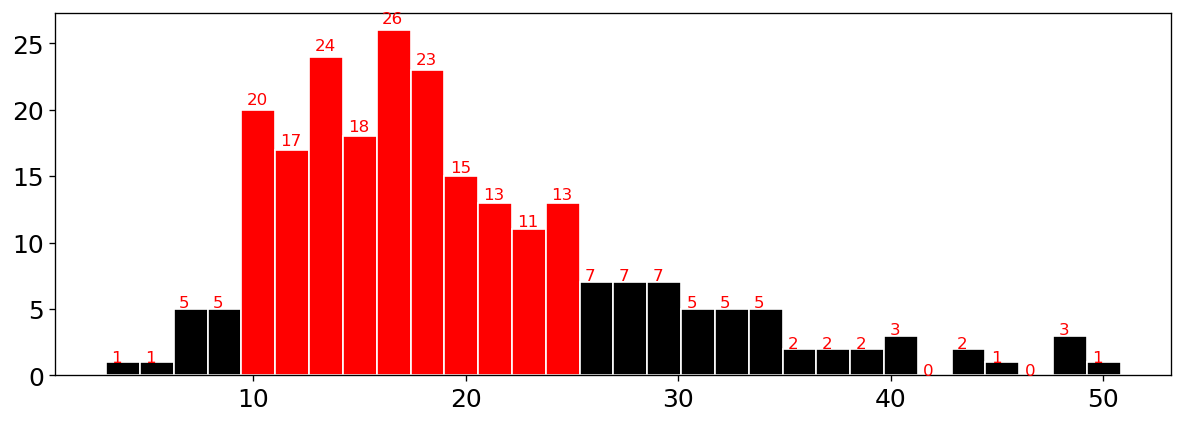

In [281]:
def col_gen(v, th=10):
    if v >= th:
        return 'red'
    else:
        return 'black'
freq, cls, bars = plt.hist('total_bill', data=tips, bins=30)
for bar in bars:
    
    x = bar.get_x() + 0.25
    y = bar.get_height()
    bar.set_fc(col_gen(y))
    bar.set_ec('w')
    y = y*1.02
    plt.text(x, y, int(bar.get_height()), fontsize=10, color='red')

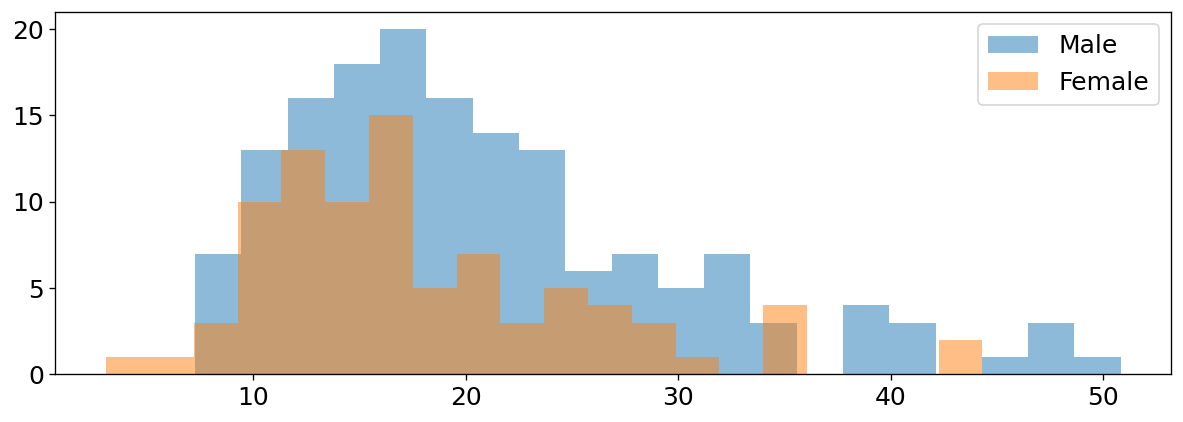

In [287]:
for label, group in tips.groupby('sex'):
    plt.hist("total_bill", data=group, label=label, alpha=0.5, bins=20)

plt.legend()
plt.show()

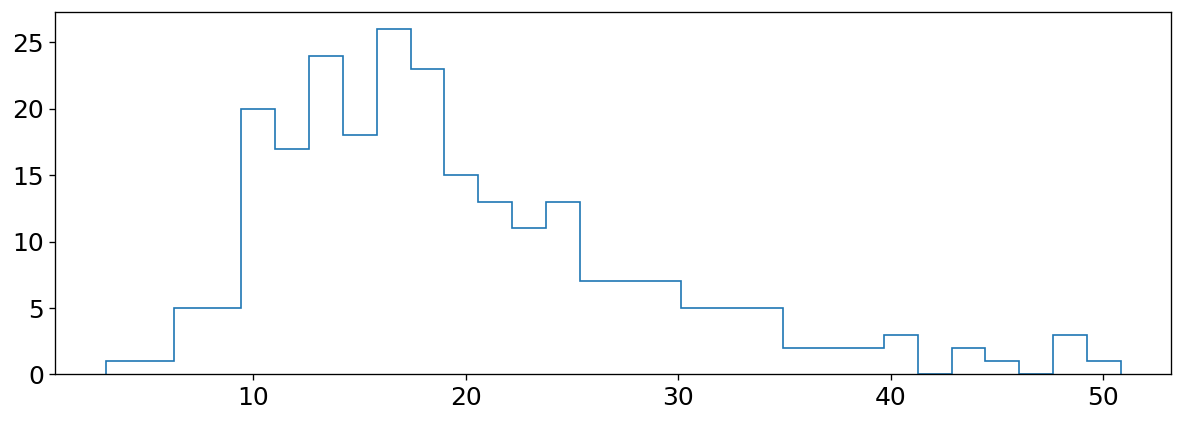

In [295]:
fr, dp, bars = plt.hist('total_bill', data=tips, bins=30, histtype='step', )
# 'bar', 'barstacked', 'step', 'stepfilled'

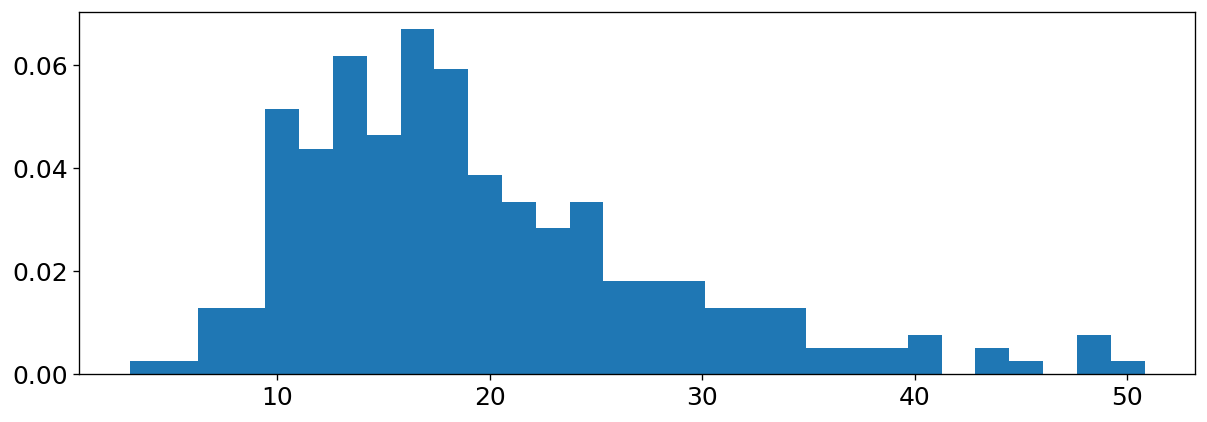

In [297]:
fr, dp, bars = plt.hist('total_bill', data=tips, bins=30, density=True)
# 'bar', 'barstacked', 'step', 'stepfilled'

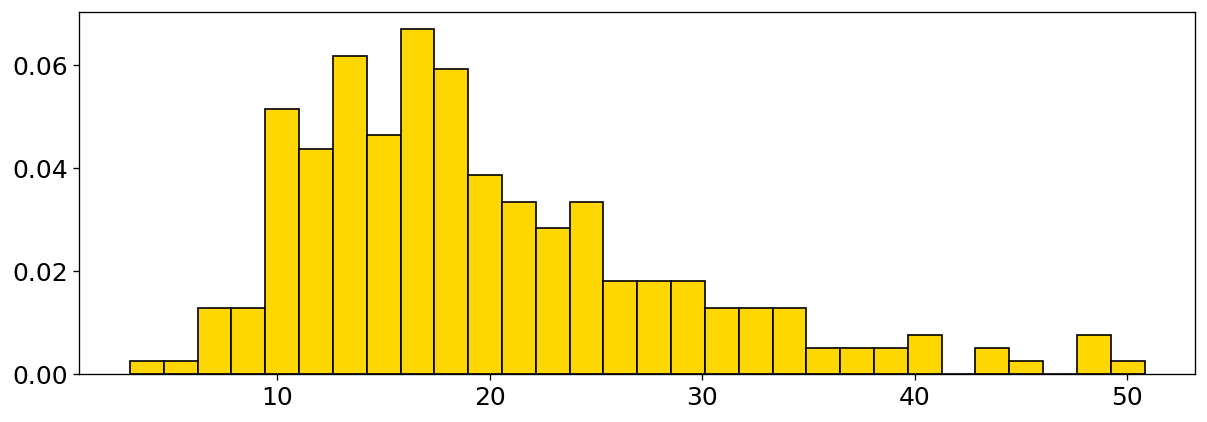

In [298]:
fr, dp, bars = plt.hist('total_bill', data=tips, ec='k', fc='gold', bins=30, density=True)
# 'bar', 'barstacked', 'step', 'stepfilled'

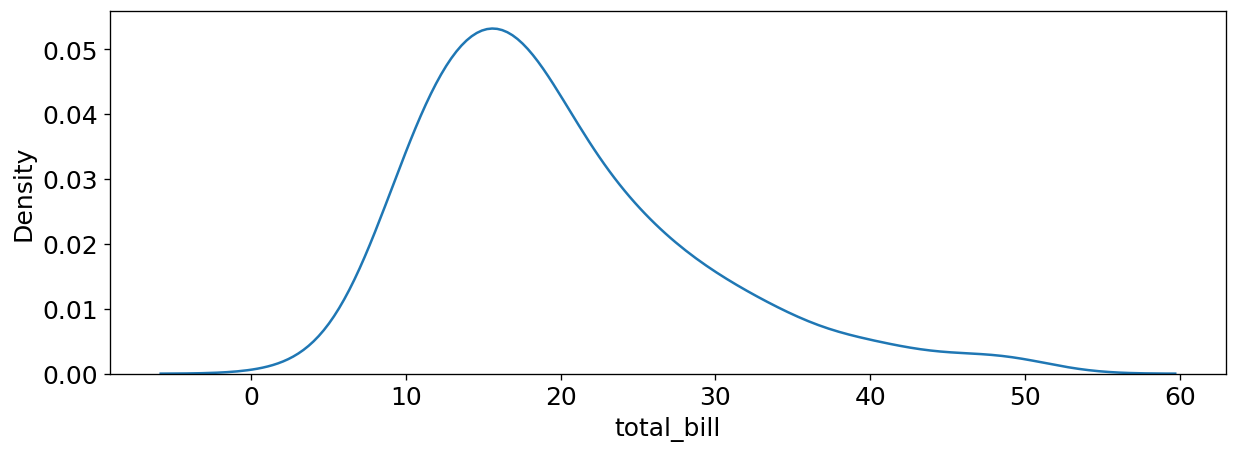

In [303]:
sns.kdeplot(tips['total_bill'])
plt.show()

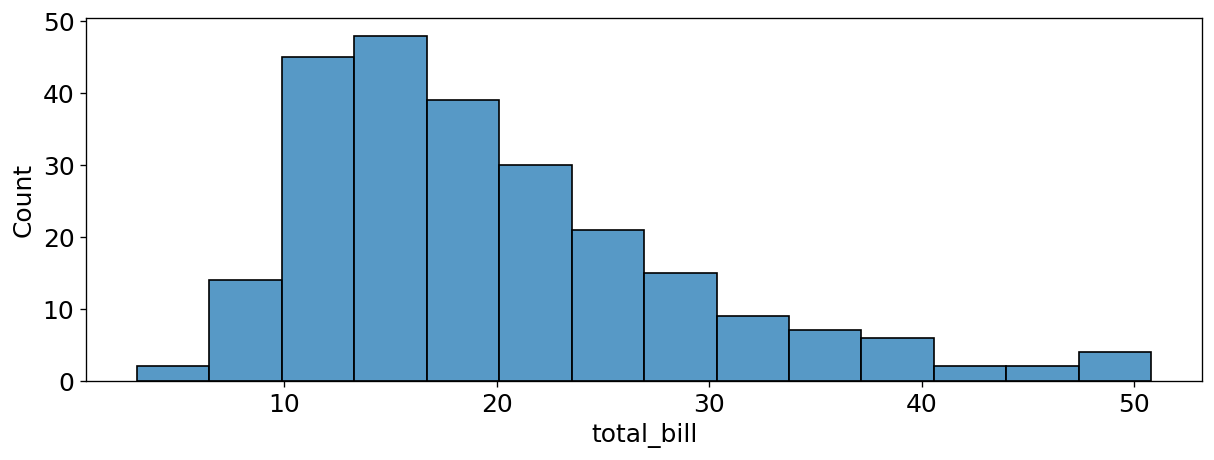

In [301]:
sns.histplot(tips['total_bill'])
plt.show()

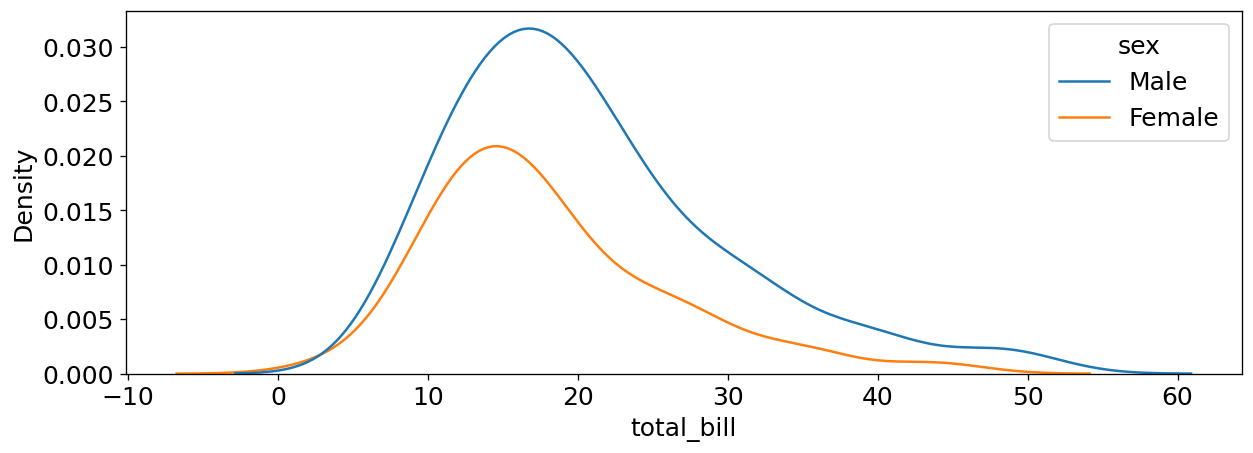

In [305]:
sns.kdeplot('total_bill', hue="sex", data=tips)
plt.show()

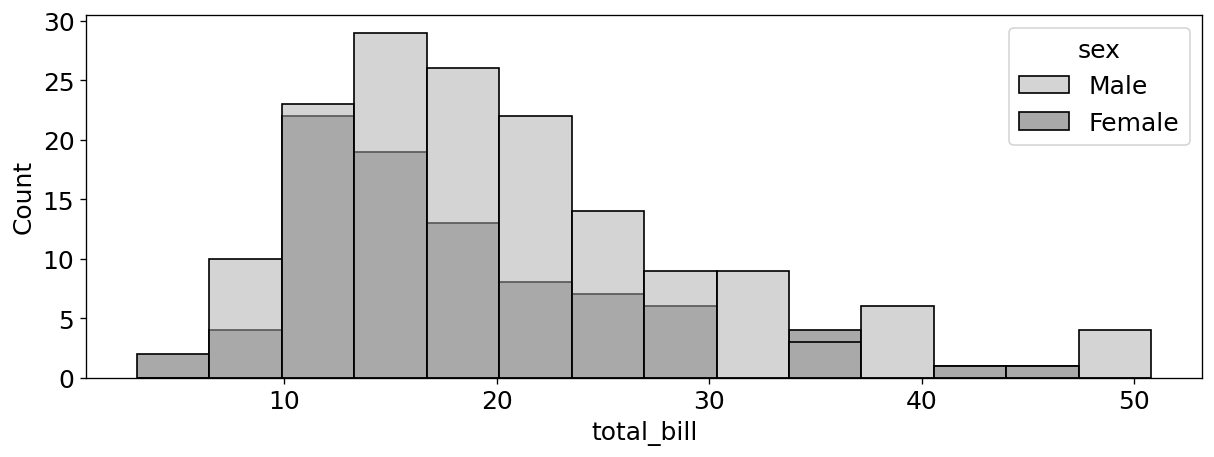

In [308]:
sns.histplot(x='total_bill', hue="sex", data=tips, palette='binary')
plt.show()

### Pie, Box, HeatMap